#About

There is a pattern recognition algorithm in this notebook.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reading data

In [2]:
data = pd.read_csv('data/strawtubesPoint_decoded_hits.csv')
data.irow(range(0,5))

,Unnamed: 0,Unnamed: 0.1,Bits,TrackID,Px,Py,Pz,Time,Length,ELoss,...,Z,PdgCode,dist2Wire,event,k,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb
0,0,0,50331648,3,-0.358307,-0.329753,15.881699,232.044861,0.139202,0.000000,...,-1974.859985,-13,0.274822,0,0,5,0,0,0,319
1,1,1,50331648,3,-0.358236,-0.330276,15.881608,232.074081,0.623953,0.000002,...,-1973.742188,-13,0.582455,0,1,5,0,0,1,320
2,2,2,50331648,3,-0.358310,-0.330085,15.881518,232.118286,0.955728,0.000044,...,-1972.251953,-13,0.111252,0,2,5,0,1,0,319
3,3,3,50331648,3,-0.358471,-0.329928,15.881445,232.406479,0.675162,0.000003,...,-1963.756592,-13,0.164412,0,3,5,1,0,1,320
4,4,4,50331648,3,-0.358435,-0.329922,15.881428,232.488541,0.971867,0.000005,...,-1961.149292,-13,0.226827,0,4,5,1,1,1,320


#Y views in stations 1&2

Look for tracks in the 16 layers with horizontal wires (Y views) in station 1&2 (e.g. station 1-y1,y2, station 2-y1,y2).

###Get layers

In [3]:
layer1000 = data[(data.StatNb==1)&(data.ViewNb==0)&(data.PlaneNb==0)&(data.LayerNb==0)]
layer1001 = data[(data.StatNb==1)&(data.ViewNb==0)&(data.PlaneNb==0)&(data.LayerNb==1)]
layer1010 = data[(data.StatNb==1)&(data.ViewNb==0)&(data.PlaneNb==1)&(data.LayerNb==0)]
layer1011 = data[(data.StatNb==1)&(data.ViewNb==0)&(data.PlaneNb==1)&(data.LayerNb==1)]

layer1300 = data[(data.StatNb==1)&(data.ViewNb==3)&(data.PlaneNb==0)&(data.LayerNb==0)]
layer1301 = data[(data.StatNb==1)&(data.ViewNb==3)&(data.PlaneNb==0)&(data.LayerNb==1)]
layer1310 = data[(data.StatNb==1)&(data.ViewNb==3)&(data.PlaneNb==1)&(data.LayerNb==0)]
layer1311 = data[(data.StatNb==1)&(data.ViewNb==3)&(data.PlaneNb==1)&(data.LayerNb==1)]

layer2000 = data[(data.StatNb==2)&(data.ViewNb==0)&(data.PlaneNb==0)&(data.LayerNb==0)]
layer2001 = data[(data.StatNb==2)&(data.ViewNb==0)&(data.PlaneNb==0)&(data.LayerNb==1)]
layer2010 = data[(data.StatNb==2)&(data.ViewNb==0)&(data.PlaneNb==1)&(data.LayerNb==0)]
layer2011 = data[(data.StatNb==2)&(data.ViewNb==0)&(data.PlaneNb==1)&(data.LayerNb==1)]

layer2300 = data[(data.StatNb==2)&(data.ViewNb==3)&(data.PlaneNb==0)&(data.LayerNb==0)]
layer2301 = data[(data.StatNb==2)&(data.ViewNb==3)&(data.PlaneNb==0)&(data.LayerNb==1)]
layer2310 = data[(data.StatNb==2)&(data.ViewNb==3)&(data.PlaneNb==1)&(data.LayerNb==0)]
layer2311 = data[(data.StatNb==2)&(data.ViewNb==3)&(data.PlaneNb==1)&(data.LayerNb==1)]


print 'layer1000: ', layer1000.shape
print 'layer1001: ', layer1001.shape
print 'layer1010: ', layer1010.shape
print 'layer1011: ', layer1011.shape

print 'layer1300: ', layer1300.shape
print 'layer1301: ', layer1301.shape
print 'layer1310: ', layer1310.shape
print 'layer1311: ', layer1311.shape

print 'layer2000: ', layer2000.shape
print 'layer2001: ', layer2001.shape
print 'layer2010: ', layer2010.shape
print 'layer2011: ', layer2011.shape

print 'layer2300: ', layer2300.shape
print 'layer2301: ', layer2301.shape
print 'layer2310: ', layer2310.shape
print 'layer2311: ', layer2311.shape

layer1000:  (3558, 23)
layer1001:  (3594, 23)
layer1010:  (3531, 23)
layer1011:  (3578, 23)
layer1300:  (3351, 23)
layer1301:  (3360, 23)
layer1310:  (3390, 23)
layer1311:  (3448, 23)
layer2000:  (3444, 23)
layer2001:  (3605, 23)
layer2010:  (3625, 23)
layer2011:  (3611, 23)
layer2300:  (3481, 23)
layer2301:  (3516, 23)
layer2310:  (3504, 23)
layer2311:  (3431, 23)


###Set wires coordinates (cm)

In [4]:
#1-y1
z1000 = 2598. - 15. - 0.5*(2.6 - 1.1 - 0.9828) - 1.1 - 0.5*0.9828
layer1000['Wy'] = (0.5*0.9828 + 1.76*layer1000.StrawNb.values)
layer1000['Wz'] = np.ones(layer1000.shape[0])*z1000

z1001 = z1000 + 1.1
layer1001['Wy'] = (0.5*0.9828 + 0.88 + 1.76*layer1001.StrawNb.values)
layer1001['Wz'] = np.ones(layer1001.shape[0])*z1001

z1010 = z1000 + 2.6
layer1010['Wy'] = (0.5*0.9828 + 0.44 + 1.76*layer1010.StrawNb.values)
layer1010['Wz'] = np.ones(layer1010.shape[0])*z1010

z1011 = z1010 + 1.1
layer1011['Wy'] = (0.5*0.9828 + 0.44 + 0.88 + 1.76*layer1011.StrawNb.values)
layer1011['Wz'] = np.ones(layer1011.shape[0])*z1011

#1-y2
z1300 = 2598. + 15. - 0.5*(2.6 - 1.1 - 0.9828) - 1.1 - 0.5*0.9828
layer1300['Wy'] = (0.5*0.9828 + 1.76*layer1300.StrawNb.values)
layer1300['Wz'] = np.ones(layer1300.shape[0])*z1300

z1301 = z1300 + 1.1
layer1301['Wy'] = (0.5*0.9828 + 0.88 + 1.76*layer1301.StrawNb.values)
layer1301['Wz'] = np.ones(layer1301.shape[0])*z1301

z1310 = z1300 + 2.6
layer1310['Wy'] = (0.5*0.9828 + 0.44 + 1.76*layer1310.StrawNb.values)
layer1310['Wz'] = np.ones(layer1310.shape[0])*z1310

z1311 = z1310 + 1.1
layer1311['Wy'] = (0.5*0.9828 + 0.44 + 0.88 + 1.76*layer1311.StrawNb.values)
layer1311['Wz'] = np.ones(layer1311.shape[0])*z1311

#2-y1
z2000 = 2798. - 15. - 0.5*(2.6 - 1.1 - 0.9828) - 1.1 - 0.5*0.9828
layer2000['Wy'] = (0.5*0.9828 + 1.76*layer2000.StrawNb.values)
layer2000['Wz'] = np.ones(layer2000.shape[0])*z2000

z2001 = z2000 + 1.1
layer2001['Wy'] = (0.5*0.9828 + 0.88 + 1.76*layer2001.StrawNb.values)
layer2001['Wz'] = np.ones(layer2001.shape[0])*z2001

z2010 = z2000 + 2.6
layer2010['Wy'] = (0.5*0.9828 + 0.44 + 1.76*layer2010.StrawNb.values)
layer2010['Wz'] = np.ones(layer2010.shape[0])*z2010

z2011 = z2010 + 1.1
layer2011['Wy'] = (0.5*0.9828 + 0.44 + 0.88 + 1.76*layer2011.StrawNb.values)
layer2011['Wz'] = np.ones(layer2011.shape[0])*z2011

#2-y2
z2300 = 2798. + 15. - 0.5*(2.6 - 1.1 - 0.9828) - 1.1 - 0.5*0.9828
layer2300['Wy'] = (0.5*0.9828 + 1.76*layer2300.StrawNb.values)
layer2300['Wz'] = np.ones(layer2300.shape[0])*z2300

z2301 = z2300 + 1.1
layer2301['Wy'] = (0.5*0.9828 + 0.88 + 1.76*layer2301.StrawNb.values)
layer2301['Wz'] = np.ones(layer2301.shape[0])*z2301

z2310 = z2300 + 2.6
layer2310['Wy'] = (0.5*0.9828 + 0.44 + 1.76*layer2310.StrawNb.values)
layer2310['Wz'] = np.ones(layer2310.shape[0])*z2310

z2311 = z2310 + 1.1
layer2311['Wy'] = (0.5*0.9828 + 0.44 + 0.88 + 1.76*layer2311.StrawNb.values)
layer2311['Wz'] = np.ones(layer2311.shape[0])*z2311

System of coordinates in the description and the MC true data dismatches.

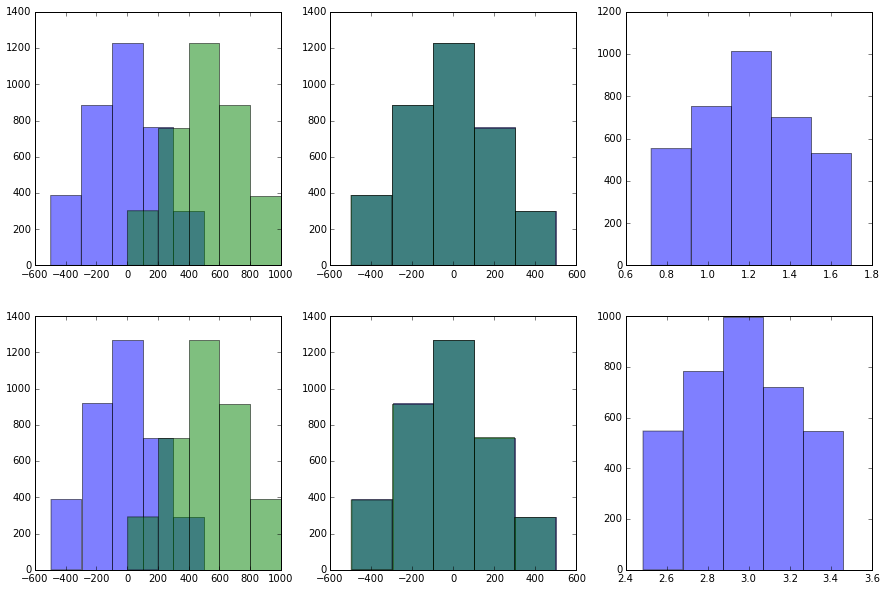

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(layer1000.Y.values, bins=5, alpha=0.5, color='b')
plt.hist(layer1000.Wy.values, bins=5, alpha=0.5, color='g')
plt.subplot(2,3,2)
plt.hist(layer1000.Y.values, bins=5, alpha=0.5, color='b')
plt.hist(500 - layer1000.Wy.values, bins=5, alpha=0.5, color='g')
plt.subplot(2,3,3)
plt.hist(layer1000.Y.values - (500 - layer1000.Wy.values), bins=5, alpha=0.5, color='b')

plt.subplot(2,3,4)
plt.hist(layer1001.Y.values, bins=5, alpha=0.5, color='b')
plt.hist(layer1001.Wy.values, bins=5, alpha=0.5, color='g')
plt.subplot(2,3,5)
plt.hist(layer1001.Y.values, bins=5, alpha=0.5, color='b')
plt.hist(500 - layer1001.Wy.values, bins=5, alpha=0.5, color='g')
plt.subplot(2,3,6)
plt.hist(layer1001.Y.values - (500 - layer1001.Wy.values), bins=5, alpha=0.5, color='b')
plt.show()

###Looking for tracks

In [6]:
layers = [layer1000, layer1001, layer1010, layer1011,
          layer1300, layer1301, layer1310, layer1311,
          layer2000, layer2001, layer2010, layer2011,
          layer2300, layer2301, layer2310, layer2311]

all_layers = pd.concat(layers, axis=0)

In [7]:
def get_planeYZ(point1, point2):
    y1 = point1[0]
    z1 = point1[1]
    y2 = point2[0]
    z2 = point2[1]
    
    #y = kz + b
    k = float(y2 - y1)/float(z2 - z1)
    b = y1 - k*z1
    return k, b

def find_hits_planeYZ(plane_k, plane_b, plane_width, layer):
    #y = kz + b; dy = width/cos(arctan(k))
    return layer[(layer['Wy'] >= plane_k*layer['Wz'] + plane_b - 1.*plane_width/np.cos(np.arctan(plane_k)))&\
                 (layer['Wy'] <= plane_k*layer['Wz'] + plane_b + 1.*plane_width/np.cos(np.arctan(plane_k)))]

In [8]:
def find_track_candidates(point1, point2, n_hits):
    k, b = get_planeYZ(point1, point2)

    points1000 = find_hits_planeYZ(k, b, 0.5*0.9828, layer1000)
    points1001 = find_hits_planeYZ(k, b, 0.5*0.9828, layer1001)
    points1010 = find_hits_planeYZ(k, b, 0.5*0.9828, layer1010)
    points1011 = find_hits_planeYZ(k, b, 0.5*0.9828, layer1011)

    points1300 = find_hits_planeYZ(k, b, 0.5*0.9828, layer1300)
    points1301 = find_hits_planeYZ(k, b, 0.5*0.9828, layer1301)
    points1310 = find_hits_planeYZ(k, b, 0.5*0.9828, layer1310)
    points1311 = find_hits_planeYZ(k, b, 0.5*0.9828, layer1311)

    points2000 = find_hits_planeYZ(k, b, 0.5*0.9828, layer2000)
    points2001 = find_hits_planeYZ(k, b, 0.5*0.9828, layer2001)
    points2010 = find_hits_planeYZ(k, b, 0.5*0.9828, layer2010)
    points2011 = find_hits_planeYZ(k, b, 0.5*0.9828, layer2011)

    points2300 = find_hits_planeYZ(k, b, 0.5*0.9828, layer2300)
    points2301 = find_hits_planeYZ(k, b, 0.5*0.9828, layer2301)
    points2310 = find_hits_planeYZ(k, b, 0.5*0.9828, layer2310)
    points2311 = find_hits_planeYZ(k, b, 0.5*0.9828, layer2311)

    list_points = [points1000, points1001, points1010, points1011,
                   points1300, points1301, points1310, points1311,
                   points2000, points2001, points2010, points2011,
                   points2300, points2301, points2310, points2311]
    
    hits_count = 0
    for p in list_points:
        if p.shape[0] != 0:
            hits_count += 1
            
    if hits_count >= n_hits:
        return 1, list_points
    else:
        return 0, list_points

In [9]:
point1 = (layer1000.Wy.values[200], layer1000.Wz.values[200])
track_candidates = []
for i in range(0, 570):
    point2 = (0.5*0.9828 + 0.44 + 0.88 + 1.76*i, z2311)
    flag, track_candidate = find_track_candidates(point1, point2, 8)
    if flag == 1:
        track_candidates.append(track_candidate)

In [10]:
len(track_candidates)

546

In [11]:
zs = [z1000, z1001, z1010, z1011,
     z1300, z1301, z1310, z1311,
     z2000, z2001, z2010, z2011,
     z2300, z2301, z2310, z2311]

In [12]:
all_points = pd.concat(track_candidates[8], axis=0)

In [13]:
pd.concat(track_candidates[8], axis=0).shape

(43, 25)

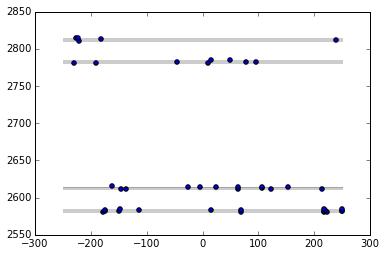

In [14]:
for z in zs:
    plt.plot([-250, 250], [z, z], c='black', alpha=0.2)
plt.scatter(all_points.X, all_points.Z)
plt.show()

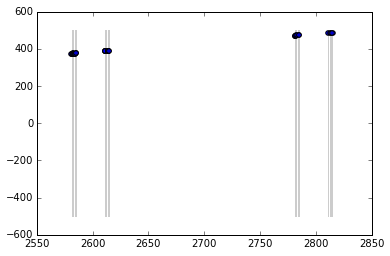

In [15]:
for z in zs:
    plt.plot([z, z], [-500, 500], c='black', alpha=0.2)
plt.scatter(all_points.Z, all_points.Y)
plt.show()

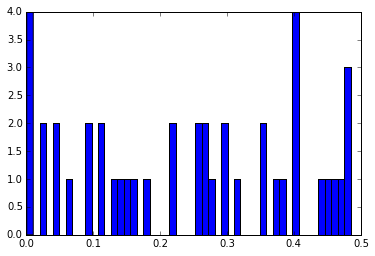

In [16]:
plt.hist(all_points.dist2Wire.values, bins=50)
plt.show()

In [194]:
all_points

,Unnamed: 0,entry,k,Bits,TrackID,Px,Py,Pz,Time,Length,...,Z,PdgCode,dist2Wire,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,Wy,Wz
1117,1117,3,960,50331648,102,0.006973,0.008721,0.001567,401.332,1.221980,...,2581.05,11,0.099603,1,0,0,0,308,542.5714,2581.15
3643,3643,4,960,50331648,102,0.006973,0.008721,0.001567,401.332,1.221980,...,2581.05,11,0.099603,1,0,0,0,308,542.5714,2581.15
6169,6169,5,960,50331648,102,0.006973,0.008721,0.001567,401.332,1.221980,...,2581.05,11,0.099603,1,0,0,0,308,542.5714,2581.15
8695,8695,6,960,50331648,102,0.006973,0.008721,0.001567,401.332,1.221980,...,2581.05,11,0.099603,1,0,0,0,308,542.5714,2581.15
11221,11221,7,960,50331648,102,0.006973,0.008721,0.001567,401.332,1.221980,...,2581.05,11,0.099603,1,0,0,0,308,542.5714,2581.15
13747,13747,8,960,50331648,102,0.006973,0.008721,0.001567,401.332,1.221980,...,2581.05,11,0.099603,1,0,0,0,308,542.5714,2581.15
16273,16273,9,960,50331648,102,0.006973,0.008721,0.001567,401.332,1.221980,...,2581.05,11,0.099603,1,0,0,0,308,542.5714,2581.15
18799,18799,10,960,50331648,102,0.006973,0.008721,0.001567,401.332,1.221980,...,2581.05,11,0.099603,1,0,0,0,308,542.5714,2581.15
21325,21325,11,960,50331648,102,0.006973,0.008721,0.001567,401.332,1.221980,...,2581.05,11,0.099603,1,0,0,0,308,542.5714,2581.15
23851,23851,12,960,50331648,102,0.006973,0.008721,0.001567,401.332,1.221980,...,2581.05,11,0.099603,1,0,0,0,308,542.5714,2581.15
